In [1]:
%pip install seaborn matplotlib fastapi uvicorn streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('family_financial_and_transactions_data.csv')

## Data cleaning

In [4]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d/%m/%y')

In [ ]:
credit_card_variability = df.groupby('Family ID')['Credit Card Spending'].std()
df = df.merge(credit_card_variability.rename('Credit Card Variability'), on='Family ID')


In [ ]:
category_spending = df.groupby('Category')['Amount'].sum()

# Fuction to Calculate Financial Score

In [7]:
def calculate_score(row):
    savings_ratio = row['Savings'] / row['Income']  
    expense_ratio = row['Monthly Expenses'] / row['Income'] 
    loan_ratio = row['Loan Payments'] / row['Income']  
    credit_card_variability = row['Credit Card Variability']  
    essential_categories = ['Groceries', 'Healthcare', 'Utilities']
    non_essential_spending = row['Category'] not in essential_categories

    
    score = (
        0.25 * savings_ratio +
        0.20 * (1 - expense_ratio) +
        0.15 * (1 - loan_ratio) +
        0.15 * (1 - credit_card_variability) +
        0.15 * (1 - non_essential_spending) +
        0.10 * (row['Financial Goals Met (%)'] / 100)
    ) * 100

    return round(score, 2)


## Apply Scoring Function


In [8]:
df['Score'] = df.apply(calculate_score, axis=1)

## Analyze Spending Patterns


In [9]:
family_spending = df.groupby('Family ID')['Amount'].sum()
member_spending = df.groupby('Member ID')['Amount'].sum()

## Select relevant financial metrics for correlation


In [10]:
financial_metrics = df[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']]

correlation_matrix = financial_metrics.corr()

## Plot the correlation matrix using Seaborn heatmap


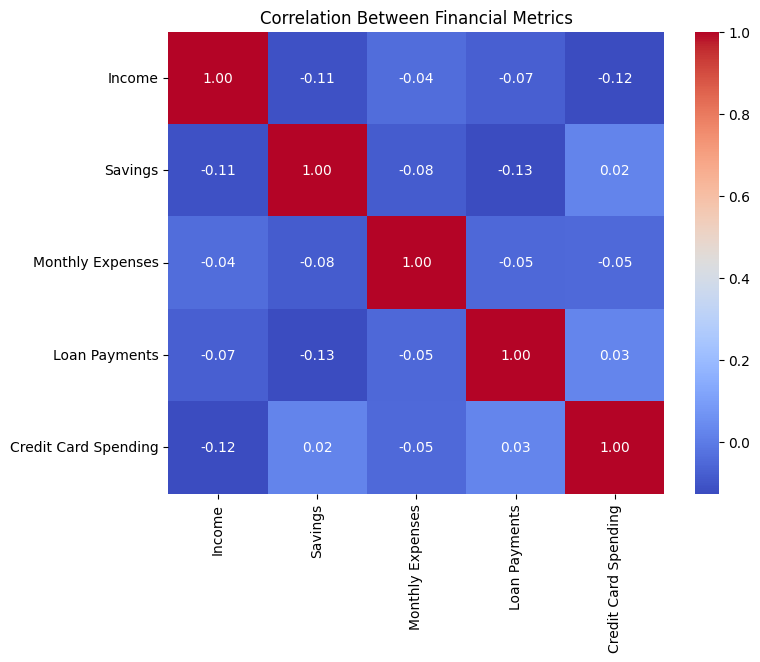

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Correlation Between Financial Metrics')
plt.show()

## Spending Distribution Across Categories

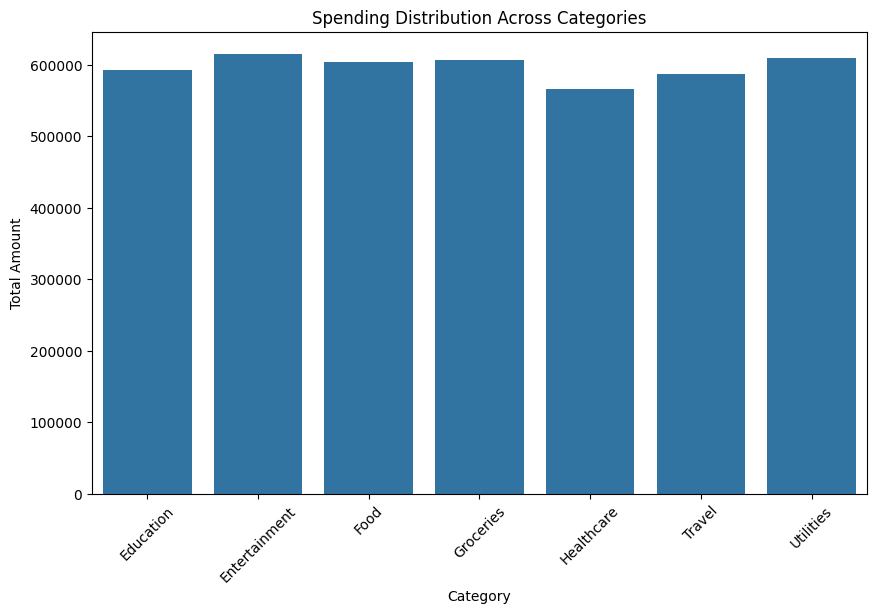

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_spending.index, y=category_spending.values)
plt.title('Spending Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

## Family-wise Financial Scores

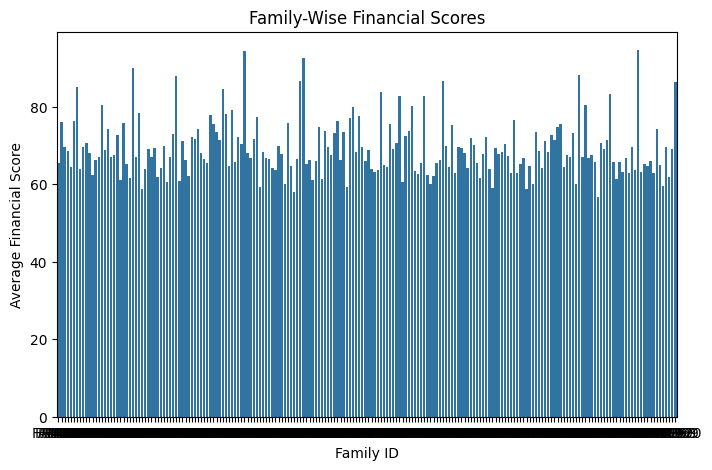

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Family ID'].unique(), y=df.groupby('Family ID')['Score'].mean())
plt.title('Family-Wise Financial Scores')
plt.xlabel('Family ID')
plt.ylabel('Average Financial Score')
plt.show()

## Member-Wise Spending Trends


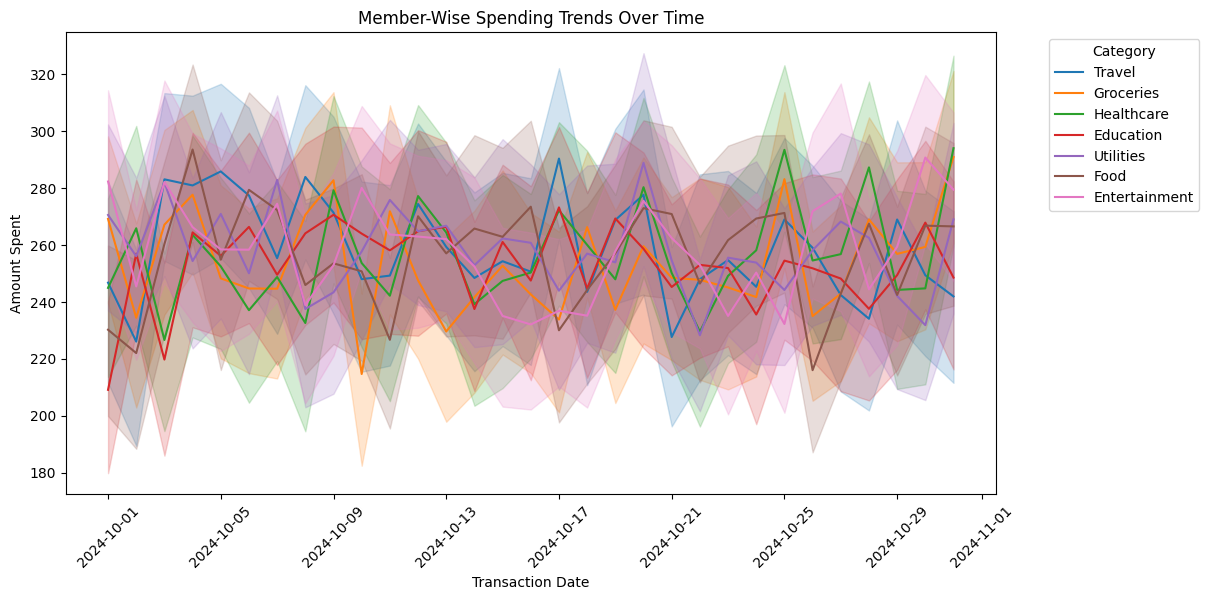

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Transaction Date', y='Amount', hue='Category')
plt.title('Member-Wise Spending Trends Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()